In [1]:
#importing the required libraries to work with Tabular data and also to implement algorithms

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
warnings.filterwarnings("ignore")

# Question: 1


1. Read the provided CSV file ‘data.csv’.
https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF?usp=sharing
2. Show the basic statistical description about the data.
3. Check if the data has null values.
a. Replace the null values with the mean
4. Select at least two columns and aggregate the data using: min, max, count, mean.
5. Filter the dataframe to select the rows with calories values between 500 and 1000.
6. Filter the dataframe to select the rows with calories values > 500 and pulse < 100.
7. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.
8. Delete the “Maxpulse” column from the main df dataframe
9. Convert the datatype of Calories column to int datatype.
10. Using pandas create a scatter plot for the two columns (Duration and Calories).


In [2]:
#1. Read the provided CSV file ‘data.csv’. https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF?usp=sharing

df = pd.read_csv("data.csv")
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [22]:
#2. Show the basic statistical description about the data.

df.describe()

,Duration,Pulse,Calories
count,169.000000,169.000000,169.000000
mean,63.846154,107.461538,375.544379
std,42.299949,14.510259,262.411685
min,15.000000,80.000000,50.000000
25%,45.000000,100.000000,253.000000
50%,60.000000,105.000000,321.000000
75%,60.000000,111.000000,384.000000
max,300.000000,159.000000,1860.000000


In [4]:
#3. Check if the data has null values.

df.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [5]:
#Replace the null values with the mean

df.fillna(df.mean(), inplace=True)
df.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [6]:
#4. Select at least two columns and aggregate the data using: min, max, count, mean.

df.agg({'Maxpulse':['min','max','count','mean'],'Calories':['min','max','count','mean']})

,Maxpulse,Calories
min,100.000000,50.300000
max,184.000000,1860.400000
count,169.000000,169.000000
mean,134.047337,375.790244


In [7]:
#5. Filter the dataframe to select the rows with calories values between 500 and 1000.

df.loc[(df['Calories']>500)&(df['Calories']<1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [8]:
#6. Filter the dataframe to select the rows with calories values > 500 and pulse < 100.

df.loc[(df['Calories']>500)&(df['Pulse']<100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [9]:
#7. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.

df_modified = df[['Duration','Pulse','Calories']]
df_modified.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [10]:
#8. Delete the “Maxpulse” column from the main df dataframe

del df['Maxpulse']

In [11]:
df.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [12]:
df.dtypes

Duration      int64
Pulse         int64
Calories    float64
dtype: object

In [13]:
#9. Convert the datatype of Calories column to int datatype.

df['Calories'] = df['Calories'].astype(np.int64)
df.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

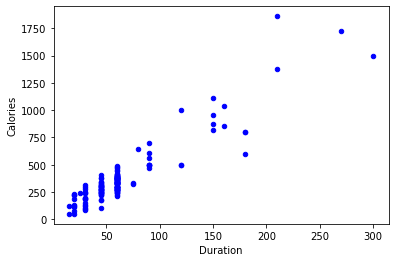

In [14]:
#10. Using pandas create a scatter plot for the two columns (Duration and Calories).

df.plot.scatter(x='Duration',y='Calories',c='blue')

# Question 2

(Glass Dataset)

    1. Implement Naïve Bayes method using scikit-learn library.
        a. Use the glass dataset available in Link also provided in your assignment.
        b. Use train_test_split to create training and testing part.
    2. Evaluate the model on testing part using score and classification_report(y_true, y_pred)
    
    1. Implement linear SVM method using scikit library
        a. Use the glass dataset available in Link also provided in your assignment.
        b. Use train_test_split to create training and testing part.
    2. Evaluate the model on testing part using score and classification_report(y_true, y_pred)

In [15]:
glass=pd.read_csv("glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [16]:
#heatmap visualisation
glass.corr().style.background_gradient(cmap="Reds")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


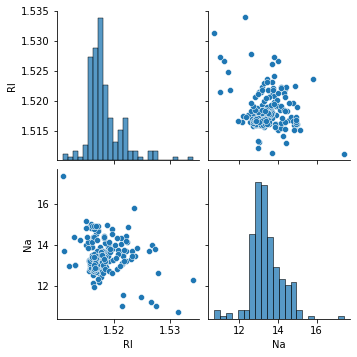

            RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na   -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg   -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al   -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si   -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K    -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca    0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba   -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe    0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   
Type -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054  0.000952   

            Ba        Fe      Type  
RI   -0.000386  0.143010 -0.164237  
Na    0.326603 -0.241346  0.502898  
Mg   -0.492262  0.083060 -0.74

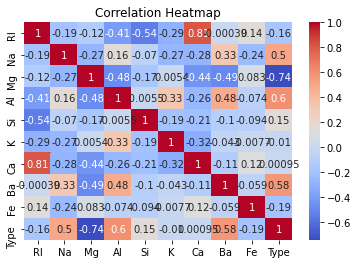

In [29]:
#scatter plot visualisation for 2 variables and correlation matrix

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the glass dataset
data = pd.read_csv('glass.csv')

# Select the numerical columns for visualization
numerical_columns = ['RI', 'Na']

# Create a scatter plot matrix
sns.pairplot(data[numerical_columns])
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the glass dataset
data = pd.read_csv('glass.csv')

# Compute the correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
features = ['Rl', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = 'Type'


X_train, X_val, Y_train, Y_val = train_test_split(glass[::-1], glass['Type'],test_size=0.2, random_state=1)

classifier = GaussianNB()

classifier.fit(X_train, Y_train)


y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.92      0.92      0.92        12
           3       1.00      0.50      0.67         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4

    accuracy                           0.84        43
   macro avg       0.76      0.69      0.71        43
weighted avg       0.89      0.84      0.85        43

[[18  1  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 1  0  3  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  0  3]]
accuracy is 0.8372093023255814


In [20]:
from sklearn.svm import SVC, LinearSVC

classifier = LinearSVC()

classifier.fit(X_train, Y_train)


y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.69      0.92      0.79        12
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4

    accuracy                           0.67        43
   macro avg       0.28      0.31      0.29        43
weighted avg       0.63      0.67      0.65        43

[[18  1  0  0  0  0]
 [ 0 11  0  1  0  0]
 [ 0  2  0  4  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  1  0  3  0  0]]
accuracy is 0.6744186046511628


# Justification:
We got better accuracy for Naïve Bayes method which is 0.8372093023255814. Naive Bayes analysis works well with probabilistic concepts where as Linear SVM works better with linear regression logics. But to perform more accurately SVM requires large amounts of data to train and test the data. So, due to the amount of data Naive Bayes algorithm gives better accuracy compared to Linear SVM.